In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, rcParams
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
rcParams['figure.figsize'] = 11,10
import joblib
link = '../Datasets/transaction_data.csv'

In [2]:
df = pd.read_csv(link)

In [3]:
df.head()

,feature0,feature1,feature2,feature3,feature4,age,feature5,cv_data,asv,cvv,Amount,CardNo,Label,location,card_type,bank
0,435.0,346.0,21.0,18.0,129.0,113.0,108.0,104.0,2.0,1.0,8829.0,13473.0,True,Nyanga,Credit,First Capital Bank
1,436.0,312.0,79.0,40.0,130.0,55.0,3.0,17.0,5.0,3.0,283.0,16023.0,False,Harare,Credit,AgriBank
2,436.0,335.0,76.0,49.0,75.0,120.0,100.0,17.0,12.0,3.0,120.0,16023.0,False,Hwange,Credit,AgriBank
3,436.0,268.0,76.0,171.0,165.0,226.0,110.0,17.0,9.0,2.0,3193.0,16023.0,False,Nyanga,Credit,Steward Bank
4,436.0,268.0,76.0,171.0,165.0,226.0,110.0,17.0,9.0,2.0,3193.0,16023.0,False,Bulawayo,Debit,Cabs Bank


In [4]:
df = df.drop(['feature0','feature1', 'feature2', 'feature3', 'feature4','feature5'], axis=1)

In [5]:
df.info()
#checking feature data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37510 entries, 0 to 37509
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        37510 non-null  float64
 1   cv_data    37510 non-null  float64
 2   asv        37510 non-null  float64
 3   cvv        37510 non-null  float64
 4   Amount     37510 non-null  float64
 5   CardNo     37510 non-null  float64
 6   Label      37510 non-null  bool   
 7   location   37510 non-null  object 
 8   card_type  37510 non-null  object 
 9   bank       37510 non-null  object 
dtypes: bool(1), float64(6), object(3)
memory usage: 2.6+ MB


In [6]:
df.head()
#brief overview of the data

,age,cv_data,asv,cvv,Amount,CardNo,Label,location,card_type,bank
0,113.0,104.0,2.0,1.0,8829.0,13473.0,True,Nyanga,Credit,First Capital Bank
1,55.0,17.0,5.0,3.0,283.0,16023.0,False,Harare,Credit,AgriBank
2,120.0,17.0,12.0,3.0,120.0,16023.0,False,Hwange,Credit,AgriBank
3,226.0,17.0,9.0,2.0,3193.0,16023.0,False,Nyanga,Credit,Steward Bank
4,226.0,17.0,9.0,2.0,3193.0,16023.0,False,Bulawayo,Debit,Cabs Bank


In [7]:
df.isnull().sum()
#checking for missing values

age          0
cv_data      0
asv          0
cvv          0
Amount       0
CardNo       0
Label        0
location     0
card_type    0
bank         0
dtype: int64

In [8]:
 df['bank'].value_counts()
#checking the distrubuting of catagories in the bank attributes

FBC Bank              9237
Cabs Bank             8162
AgriBank              8100
NMB Bank              2697
Banc ABC              2647
Steward Bank          2614
CBZ Bank              1391
First Capital Bank    1382
Standard Bank         1280
Name: bank, dtype: int64

In [9]:
 df['card_type'].value_counts()
    #checking the distrubution of catagories in the card type attributes

Credit    25088
Debit     12422
Name: card_type, dtype: int64

In [10]:
 df['location'].value_counts()
    #checking the distrubution of catagories in the location attributes

Harare       12475
Bulawayo      7146
Kadoma        5355
Nyanga        3602
Bindura       3560
Kwekwe        1816
Marondera     1780
Hwange        1776
Name: location, dtype: int64

c:\users\nyasha chizampeni\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


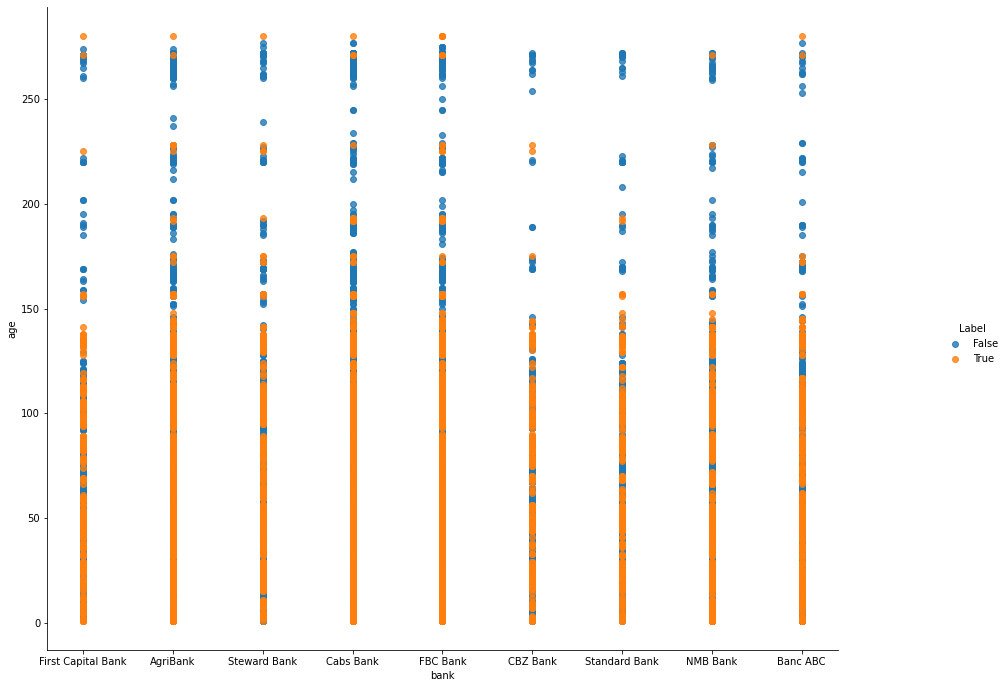

In [14]:
#data visualisation
sns.lmplot('bank', 'age', df, hue='Label', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

In [15]:
df['Label'].value_counts()
#checking the distrubution of catagories in the data label

False    30400
True      7110
Name: Label, dtype: int64

In [16]:
matrix = df.corr()

In [17]:
#checking the correlation of features with respect to the label
matrix['Label'].sort_values(ascending=False)

Label      1.000000
asv        0.279840
age        0.140879
CardNo     0.020879
cvv        0.006058
cv_data   -0.027918
Amount    -0.050214
Name: Label, dtype: float64

<AxesSubplot:>

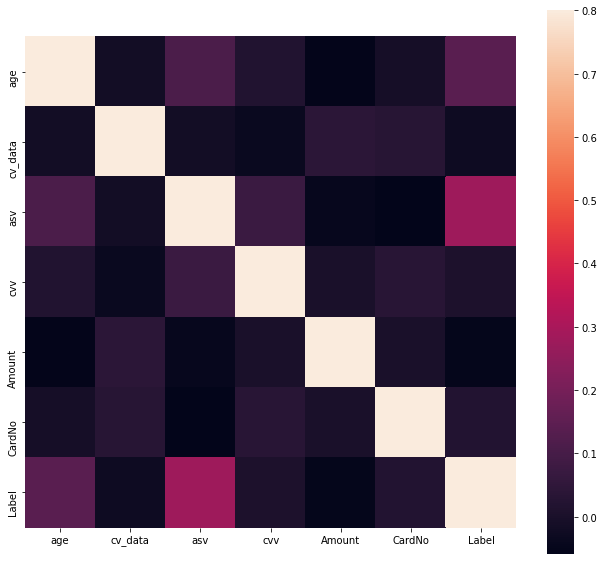

In [18]:
#plotting a correlation heat map
sns.heatmap(matrix, vmax=0.8, square=True)

In [19]:
#defing a data transformation pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import StandardScaler
num_pipe = Pipeline([
('imputer', Imputer(strategy="median")),
('std_scaler', StandardScaler()),
])

pipe = ColumnTransformer([
("num", num_pipe, ['age', 'cv_data', 'asv', 'cvv', 'Amount', 'CardNo']),
("cat", OneHotEncoder(), ['card_type','location','bank'])
])

#exporting the data transformation pipeline
#joblib.dump(pipe,'pipeline.pkl')

In [20]:
#separating the data label from the other features

target = "Label"
X = df.drop(target, axis=1)  #training set
y = df[target]   #labels
print(X)
#transforming the data
pipe= pipe.fit(X)
#joblib.dump(pipe,'pipeline.pkl')
X = pipe.transform(X)

         age  cv_data   asv  cvv  Amount     CardNo  location card_type  \
0      113.0    104.0   2.0  1.0  8829.0    13473.0    Nyanga    Credit   
1       55.0     17.0   5.0  3.0   283.0    16023.0    Harare    Credit   
2      120.0     17.0  12.0  3.0   120.0    16023.0    Hwange    Credit   
3      226.0     17.0   9.0  2.0  3193.0    16023.0    Nyanga    Credit   
4      226.0     17.0   9.0  2.0  3193.0    16023.0  Bulawayo     Debit   
...      ...      ...   ...  ...     ...        ...       ...       ...   
37505   82.0      7.0   7.0  3.0    16.0  6384795.0   Bindura    Credit   
37506   82.0      7.0   7.0  3.0    16.0  6384795.0    Hwange    Credit   
37507   82.0      7.0   7.0  3.0    16.0  6384795.0  Bulawayo    Credit   
37508   82.0      7.0   7.0  3.0    16.0  6384795.0    Harare    Credit   
37509   92.0      4.0  11.0  1.0   206.0  6386283.0    Kadoma     Debit   

                     bank  
0      First Capital Bank  
1                AgriBank  
2              

In [18]:
X.shape


(37510, 25)

In [19]:
y.shape

(37510,)

In [20]:
#defing the outlier fraction for the local Outlier Factor algorithm
fraud = df[df['Label'] == 1]
normal = df[df['Label'] == 0]
outlier_fraction =  len(fraud) / float(len(normal))
outlier_fraction

0.2338815789473684

In [21]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.tree import DecisionTreeClassifier

In [22]:
classifier_accuracy = {}


In [23]:
#initializing the classification algorithms
classifiers = {
               'Local Outlier Factor': LocalOutlierFactor(n_neighbors=20, contamination=outlier_fraction, algorithm='auto', leaf_size=25, metric='minkowski'),
               'Support Vector Machine': OneClassSVM(kernel='rbf', degree=3, gamma= 0.1, nu=0.05, max_iter=-1),
               'Decision Tree Classifier':DecisionTreeClassifier( criterion='entropy',splitter="best", max_leaf_nodes=15),
               'Isolation Forest': IsolationForest(max_samples=len(X), contamination=outlier_fraction, random_state=1, verbose=0),
               'Ada Boost Classifier':AdaBoostClassifier(),
               'Random Forest Classifier':RandomForestClassifier(), 
               'KNeighbors Classifier': KNeighborsClassifier(5)
               
              }

In [24]:
#fitting, training and evaluating each algorithm 
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
   
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        y_pred[y_pred ==1]=0
        y_pred[y_pred ==-1]=1
        n_errors = (y_pred !=y).sum()
        print('{}:{}'.format(clf_name,n_errors))
        print('Accuracy Score:',accuracy_score(y, y_pred))
        print(classification_report(y, y_pred))
        classifier_accuracy.update({clf_name:accuracy_score(y, y_pred)})
    
    
    elif clf_name == 'Support Vector Machine':
        clf.fit(X)
        y_pred = clf.predict(X)
        y_pred[y_pred ==1]=0
        y_pred[y_pred ==-1]=1
        n_errors = (y_pred !=y).sum()
        print('{}:{}'.format(clf_name,n_errors))
        print('Accuracy Score:',accuracy_score(y, y_pred))
        print(classification_report(y, y_pred))
        classifier_accuracy.update({clf_name:accuracy_score(y, y_pred)})
    
    
    
    elif clf_name == 'Decision Tree Classifier':
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
        clf = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        n_errors = (y_pred !=y_test).sum()
        print('{}:{}'.format(clf_name,n_errors))
        print('Accuracy Score:',accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        classifier_accuracy.update({clf_name:accuracy_score(y_test, y_pred)})
        #exporting the prefered model
        #joblib.dump(clf,'fraud_detection_model.pkl')
        x = clf
    
    elif clf_name == 'Ada Boost Classifier':
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
        clf = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        n_errors = (y_pred !=y_test).sum()
        print('{}:{}'.format(clf_name,n_errors))
        print('Accuracy Score:',accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        classifier_accuracy.update({clf_name:accuracy_score(y_test, y_pred)})

        
    elif clf_name == 'Random Forest Classifier':
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
        clf = DecisionTreeClassifier()
        clf = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        n_errors = (y_pred !=y_test).sum()
        print('{}:{}'.format(clf_name,n_errors))
        print('Accuracy Score:',accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        classifier_accuracy.update({clf_name:accuracy_score(y_test, y_pred)})

    elif clf_name == 'KNeighbors Classifier':
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
        clf = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        n_errors = (y_pred !=y_test).sum()
        print('{}:{}'.format(clf_name,n_errors))
        print('Accuracy Score:',accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        classifier_accuracy.update({clf_name:accuracy_score(y_test, y_pred)})
        
    else:
        clf.fit(X)
        score_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        y_pred[y_pred ==1]=0
        y_pred[y_pred ==-1]=1
        n_errors = (y_pred !=y).sum()
        print('{}:{}'.format(clf_name,n_errors))
        print('Accuracy Score:',accuracy_score(y, y_pred))
        print(classification_report(y, y_pred))
        classifier_accuracy.update({clf_name:accuracy_score(y, y_pred)})
    print('-------------------------------------------------------------')

Local Outlier Factor:11949
Accuracy Score: 0.681444948013863
              precision    recall  f1-score   support

       False       0.82      0.78      0.80     30400
        True       0.22      0.28      0.25      7110

    accuracy                           0.68     37510
   macro avg       0.52      0.53      0.52     37510
weighted avg       0.71      0.68      0.69     37510

-------------------------------------------------------------
Support Vector Machine:8281
Accuracy Score: 0.7792322047454012
              precision    recall  f1-score   support

       False       0.81      0.95      0.87     30400
        True       0.19      0.05      0.08      7110

    accuracy                           0.78     37510
   macro avg       0.50      0.50      0.48     37510
weighted avg       0.69      0.78      0.72     37510

-------------------------------------------------------------
Decision Tree Classifier:1881
Accuracy Score: 0.8328445747800587
              precision    recall

In [25]:
#creating a table of classifiers and thier accuracy
ca = [[a,b] for a,b in classifier_accuracy.items()]
ca = pd.DataFrame(ca, columns=['Classifier','Accuracy'])
ca


,Classifier,Accuracy
0,Local Outlier Factor,0.681445
1,Support Vector Machine,0.779232
2,Decision Tree Classifier,0.832845
3,Isolation Forest,0.665129
4,Ada Boost Classifier,0.838976
5,Random Forest Classifier,0.976717
6,KNeighbors Classifier,0.826713


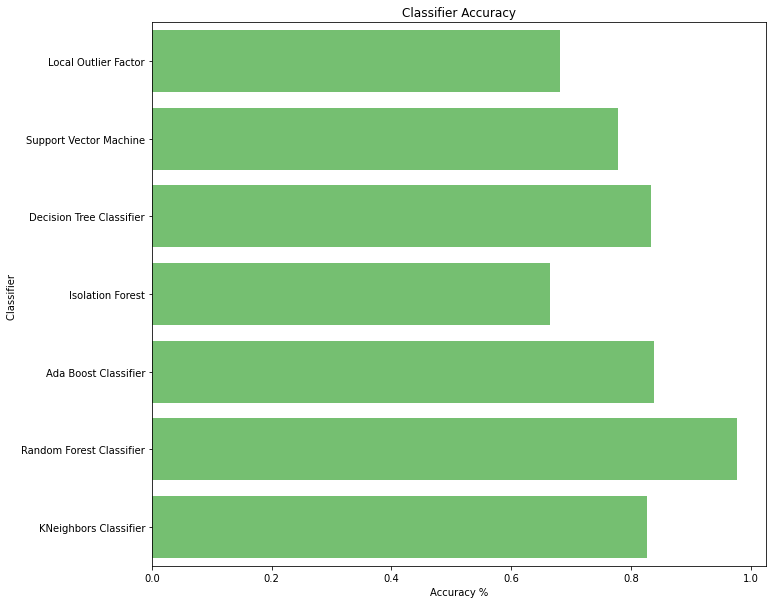

In [26]:
#plotting classifiers and thier accuracy
import seaborn as sns
sns.set_color_codes('muted')
sns.barplot(x='Accuracy', y='Classifier', data=ca, color='g')
plt.xlabel('Accuracy %')
plt.ylabel('Classifier ')
plt.title('Classifier Accuracy')
plt.show()